In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [11]:
df=pd.read_csv('data/raw.csv')

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df.shape

(1000, 8)

In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
print("Categories in 'gender' variable      " ,end="")
print(df["gender"].unique())

print("Categories in 'race_ethnicity' variable      " ,end="")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable      " ,end="")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable      " ,end="")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable      " ,end="")
print(df["test preparation course"].unique())

Categories in 'gender' variable      ['female' 'male']
Categories in 'race_ethnicity' variable      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable      ['standard' 'free/reduced']
Categories in 'test preparation course' variable      ['none' 'completed']


In [28]:
numerical_features=[feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype == "O"]
print(numerical_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [31]:
df["total score"]=df["math score"] + df["reading score"] + df["writing score"]
df["average"]=df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full=df[df["reading score"] ==100]["average"].count()
math_full=df[df["math score"]==100]["average"].count()
writing_full=df[df["writing score"]==100]["average"].count()

print("Number of students full marks in maths",math_full)
print("Number of students full marks in reading",reading_full)
print("Number of students full marks in writing",writing_full)

Number of students full marks in maths 7
Number of students full marks in reading 17
Number of students full marks in writing 14


In [33]:
reading_less_20=df[df["reading score"] <=20]["average"].count()
math_less_20=df[df["math score"]<=20]["average"].count()
writing_less_20=df[df["writing score"]<=20]["average"].count()

print("Number of students full marks in maths",math_less_20)
print("Number of students full marks in reading",reading_less_20)
print("Number of students full marks in writing",writing_less_20)

Number of students full marks in maths 4
Number of students full marks in reading 1
Number of students full marks in writing 3


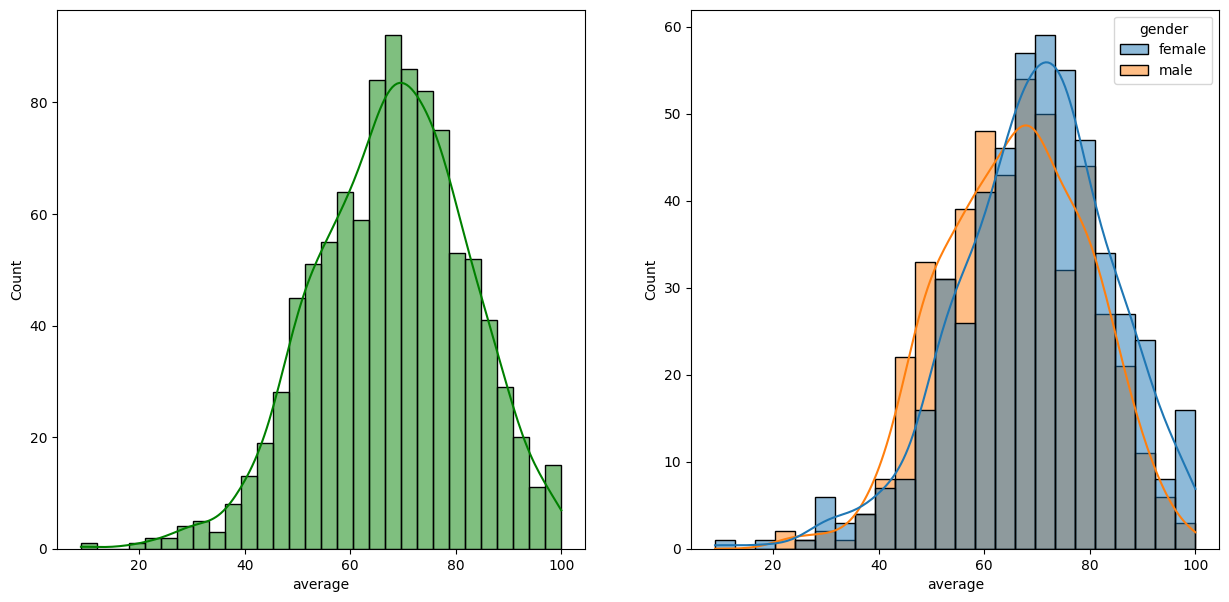

In [39]:
fig , axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue="gender")
plt.show()

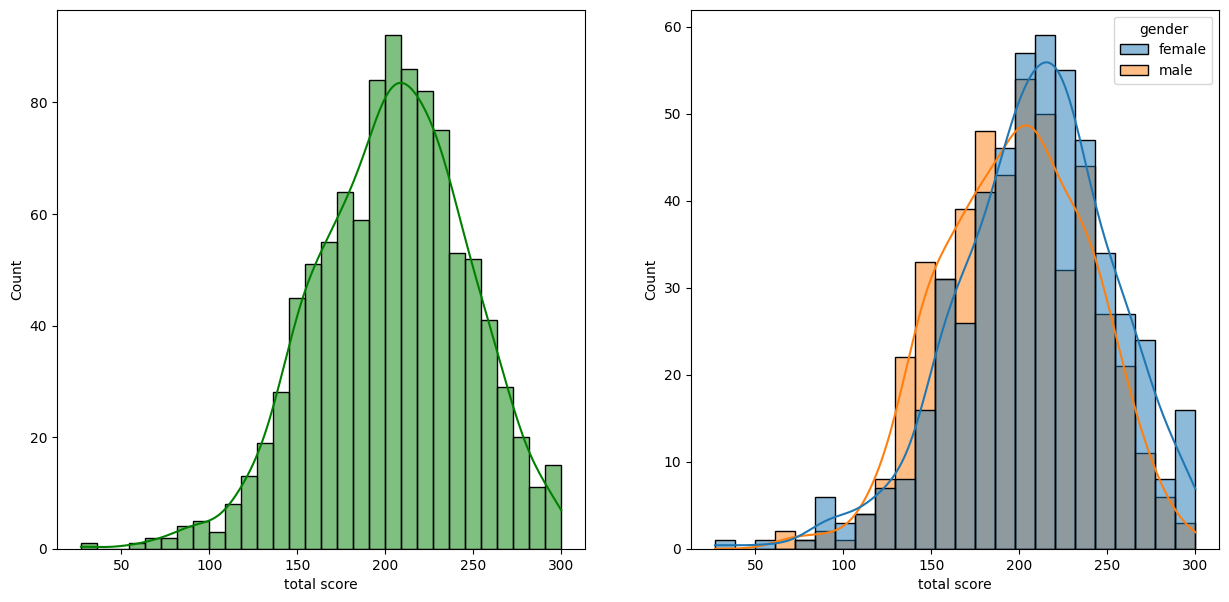

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color="g")
plt.subplot(122)
plt.show()

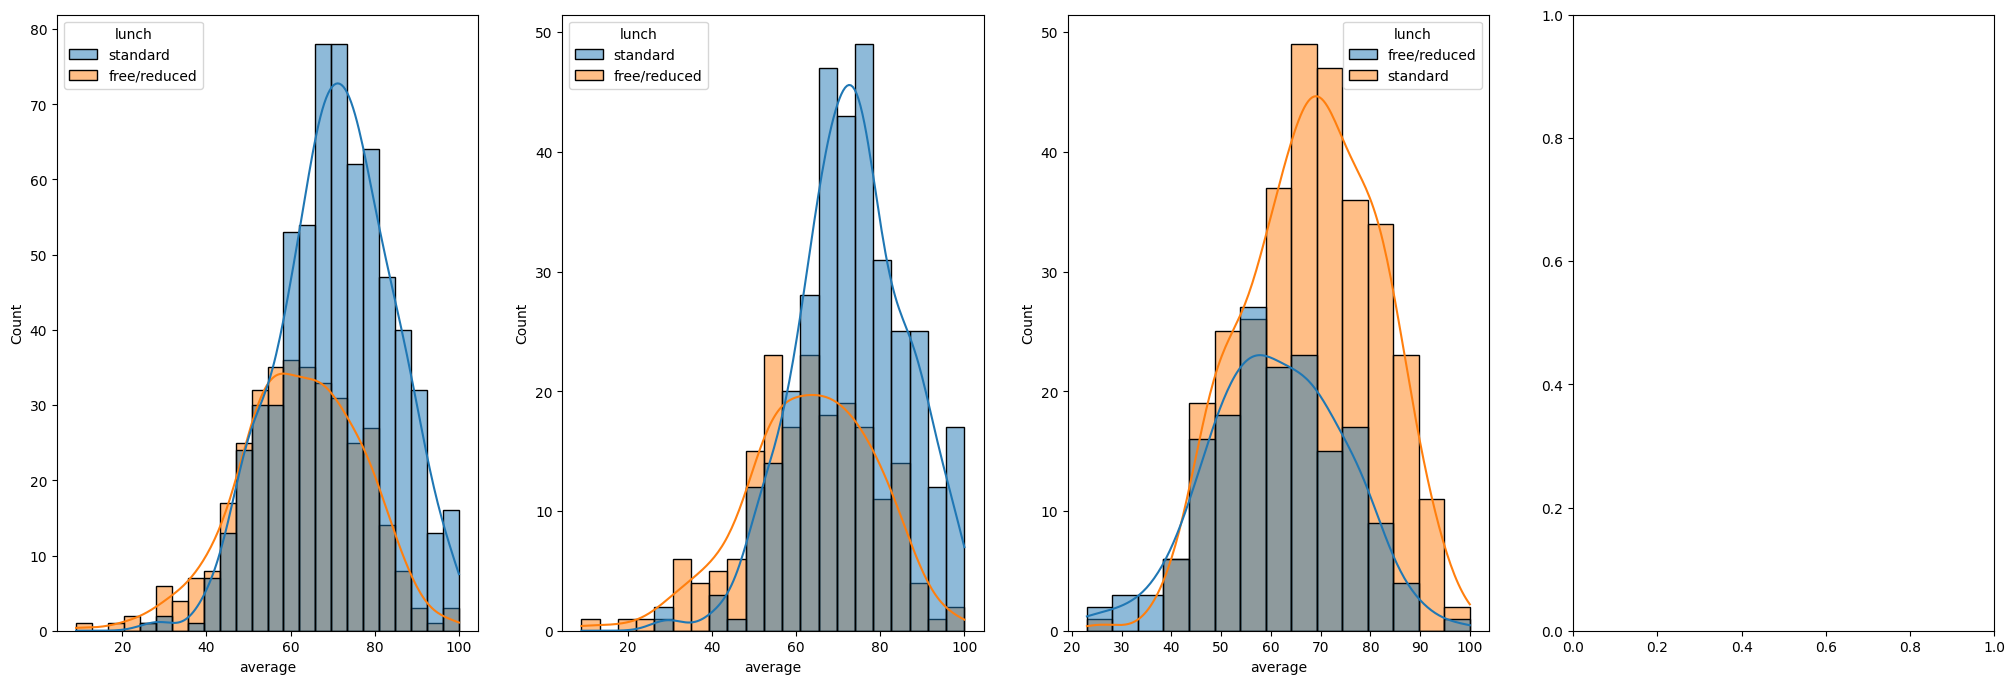

In [47]:
plt.subplots(1,4,figsize=(25,8))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df["gender"]=="female"],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df["gender"]=='male'],x='average',kde=True,hue='lunch')
plt.show()